# Diamond Estimator

The purpose of this project is to create a linear regression model that can be used to predict the price of diamonds based on various factors.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

## Read Dataset

In [2]:
df = pd.read_csv("Diamonds Prices2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#Drop the first column as it is unintended
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53943, 10)

In [5]:
#Check for missing values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#Check for duplicates
df.duplicated().value_counts()

False    53794
True       149
dtype: int64

In [7]:
#Drop duplicates and recheck for duplicates
df = df.drop_duplicates()
df.reset_index(drop=True)
df.duplicated().value_counts()

False    53794
dtype: int64

## Exploring the Dataset

### Categorical Columns

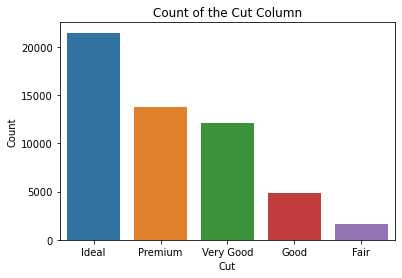

In [8]:
#Data from the cut column shows categories that can be placed on to a scale
sns.barplot(x = df["cut"].value_counts().index, y = df["cut"].value_counts())
plt.xlabel("Cut")
plt.ylabel("Count")
plt.title("Count of the Cut Column");

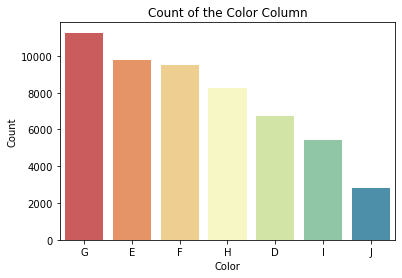

In [9]:
#Data for the color column shows categories that can be placed on to a scale
sns.barplot(x = df["color"].value_counts().index, y = df["color"].value_counts(), palette = "Spectral")
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Count of the Color Column");

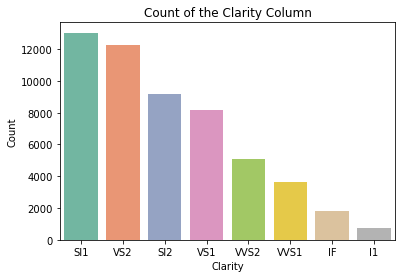

In [10]:
#Data for the clarity column shows categories that can be placed on to a scale
sns.barplot(x = df["clarity"].value_counts().index, y = df["clarity"].value_counts(), palette = "Set2")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.title("Count of the Clarity Column");

### Numerical Columns

In [11]:
round(df.describe(),3)

,carat,depth,table,price,x,y,z
count,53794.000,53794.000,53794.000,53794.000,53794.000,53794.000,53794.000
mean,0.798,61.748,57.458,3933.065,5.731,5.735,3.539
std,0.473,1.430,2.234,3988.114,1.121,1.141,0.705
min,0.200,43.000,43.000,326.000,0.000,0.000,0.000
25%,0.400,61.000,56.000,951.000,4.710,4.720,2.910
50%,0.700,61.800,57.000,2401.000,5.700,5.710,3.530
75%,1.040,62.500,59.000,5326.750,6.540,6.540,4.030
max,5.010,79.000,95.000,18823.000,10.740,58.900,31.800


In [12]:
#Set the following visualizations with a custom size
rcParams['figure.figsize'] = (12,6)

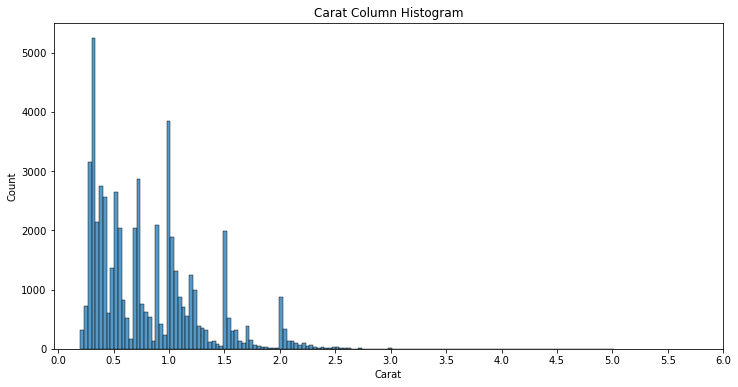

In [13]:
#Displays the carat column with a histogram
sns.histplot(x = df["carat"])
plt.xlabel("Carat")
plt.title("Carat Column Histogram")
plt.xticks(np.arange(0, 6.5, 0.5));

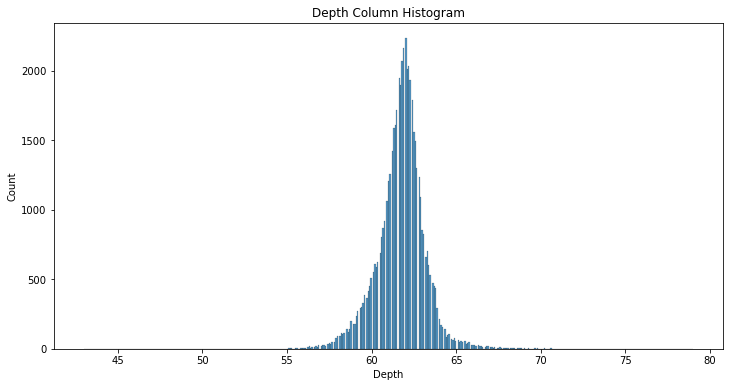

In [14]:
#Displays the dept column with a histogram
sns.histplot(x = df["depth"])
plt.xlabel("Depth")
plt.title("Depth Column Histogram");

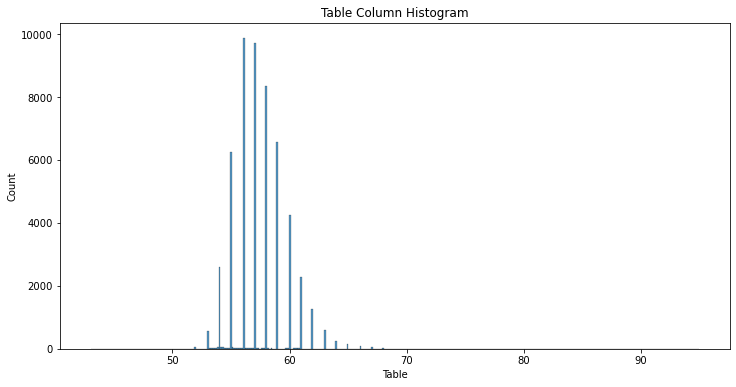

In [15]:
#Displays the table column with a histogram
sns.histplot(x = df["table"])
plt.xlabel("Table")
plt.title("Table Column Histogram");

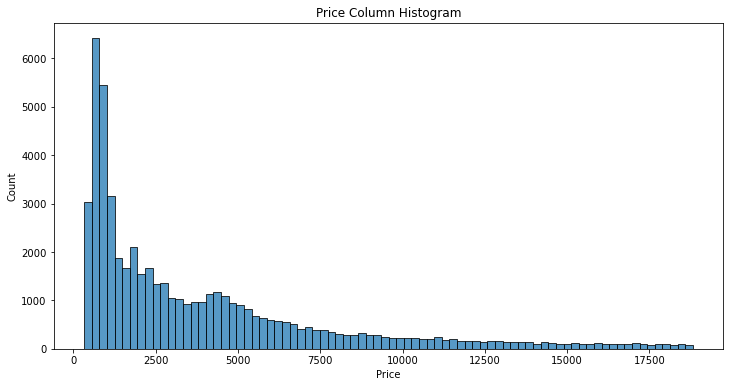

In [16]:
#Displays the price column with a histogram
sns.histplot(x = df["price"])
plt.xlabel("Price")
plt.title("Price Column Histogram");

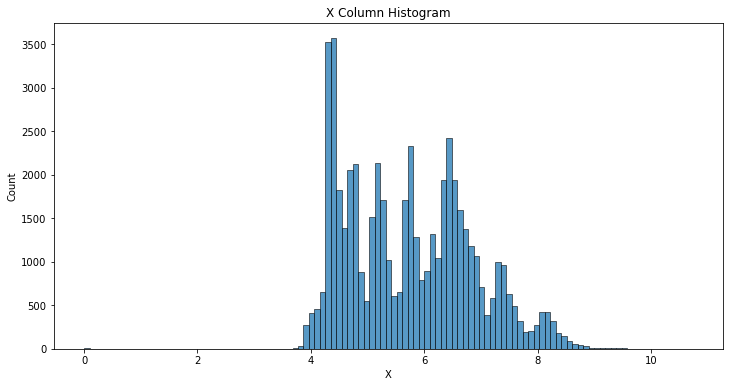

In [17]:
#Displays the x column with a histogram
sns.histplot(x = df["x"])
plt.xlabel("X")
plt.title("X Column Histogram");

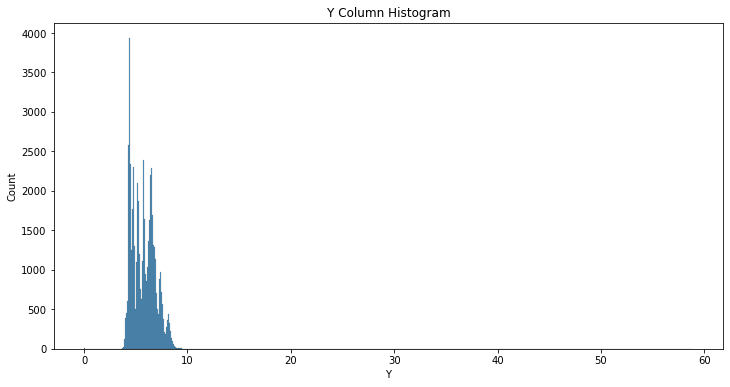

In [18]:
#Displays the y column with a histogram
sns.histplot(x = df["y"])
plt.xlabel("Y")
plt.title("Y Column Histogram");

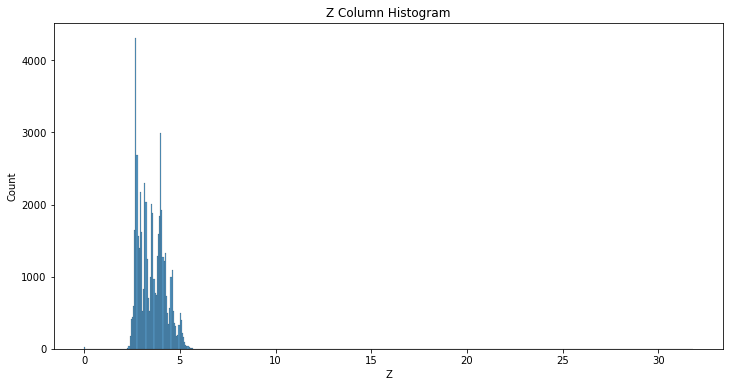

In [19]:
#Displays the z column with a histogram
sns.histplot(x = df["z"])
plt.xlabel("Z")
plt.title("Z Column Histogram");

## Outliers

In [20]:
numeric_columns = ["price","carat", "depth", "table", "x", "y", "z"]

In [21]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |(df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Ordinal Encoding

Encode the categorical variables

In [22]:
#Encode the clarity column based on known diamond clarity scales
ordinal_clarity = OrdinalEncoder(categories = [["I3","I2","I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]])
ordinal_clarity.fit(df[["clarity"]])

OrdinalEncoder(categories=[['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1',
                            'VVS2', 'VVS1', 'IF']])

In [23]:
enc_clarity = pd.DataFrame(ordinal_clarity.transform(df[["clarity"]]))
enc_clarity.columns = ["enc_clarity"]
pd.concat([df["clarity"].reset_index(drop = True), enc_clarity.reset_index(drop = True)], axis = 1).value_counts()

clarity  enc_clarity
SI1      4.0            11524
VS2      5.0            10906
SI2      3.0             7379
VS1      6.0             7360
VVS2     7.0             4673
VVS1     8.0             3456
IF       9.0             1645
I1       2.0              473
dtype: int64

In [24]:
#Add encoded column onto the main dataframe
df = pd.concat([df.reset_index(drop = True), enc_clarity.reset_index(drop = True)], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,enc_clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3.0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,7.0


In [25]:
#Encode the cut column based on known diamond cut grades
ordinal_cut = OrdinalEncoder(categories = [["Fair","Good","Very Good","Premium", "Ideal"]])

In [26]:
ordinal_cut.fit(df[["cut"]])
enc_cut = pd.DataFrame(ordinal_cut.transform(df[["cut"]]))
enc_cut.columns = ["enc_cut"]
pd.concat([df["cut"].reset_index(drop = True), enc_cut.reset_index(drop = True)], axis = 1).value_counts()

cut        enc_cut
Ideal      4.0        20281
Premium    3.0        12082
Very Good  2.0        10984
Good       1.0         3739
Fair       0.0          330
dtype: int64

In [27]:
#Add encoded column onto the main dataframe
df = pd.concat([df.reset_index(drop = True), enc_cut.reset_index(drop = True)], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,enc_clarity,enc_cut
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.0,4.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.0,3.0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.0,3.0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3.0,1.0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,7.0,2.0


In [28]:
#Encode the color column based on known diamond color scales
oe_color = OrdinalEncoder(categories = [["Other","J","I","H","G","F","E","D"]])

In [29]:
oe_color.fit(df[["color"]])
enc_color = pd.DataFrame(oe_color.transform(df[["color"]]))
enc_color.columns = ["enc_color"]
pd.concat([df["color"].reset_index(drop = True), enc_color.reset_index(drop = True)], axis = 1).value_counts()

color  enc_color
G      4.0          10056
E      6.0           8894
F      5.0           8452
H      3.0           7154
D      7.0           6175
I      2.0           4456
J      1.0           2229
dtype: int64

In [30]:
#Add encoded column onto the main dataframe
df = pd.concat([df.reset_index(drop = True), enc_color.reset_index(drop = True)], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,enc_clarity,enc_cut,enc_color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.0,4.0,6.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.0,3.0,6.0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.0,3.0,2.0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3.0,1.0,1.0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,7.0,2.0,1.0


In [31]:
#Drop the unencoded categorical columns
df = df.drop(columns = ["cut","color","clarity"])
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'enc_clarity',
       'enc_cut', 'enc_color'],
      dtype='object')

## Correlation

View the correlation between columns. There exists a high correlation between carat, measurements, and price.

In [32]:
#Reset visualization sizes
plt.rcdefaults()

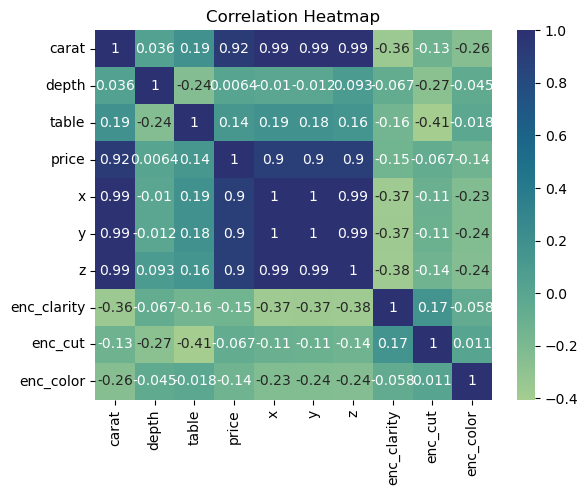

In [33]:
sns.heatmap(df.corr(), annot = True, cmap = "crest")
plt.title("Correlation Heatmap");

In [34]:
#Drop x, y, and z as they have a high correlation with carat
#x, y, and z can be used to approximate carat
df = df.drop(columns = ["x","y","z"])

## Split the Dataset

In [35]:
#Seperate the independent and dependant variables
X = df.drop(columns = "price")
Y = np.log(df['price'])

In [36]:
#Split the test and training data 7/3
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [37]:
#Examine the shape of the train and test sets
x_train.shape, x_test.shape

((33191, 6), (14225, 6))

## Regression Model

In [38]:
#initialize the model
clf = LinearRegression()

In [39]:
#Fit the model
clf.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = clf.predict(x_test)

In [41]:
#Display the metrics of the model
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))
print("R^2: " + str(r2_score(y_test,y_pred)))

MAE: 0.20774009220055756
MSE: 0.06726127917208843
RMSE: 0.25934779577256567
R^2: 0.921802036425132


## Save Model

In [42]:
#Save and export the file to be used externally
filename = 'regression_model.sav'
pickle.dump(clf, open(filename, 'wb'))